<a href="https://colab.research.google.com/github/ketanvaidya25/Emotion-Recognition/blob/main/Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
#from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Model
from keras.utils import to_categorical
from sklearn.metrics import classification_report
#from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [21]:
data = pd.read_csv('/content/drive/My Drive/icml_face_data.csv')

In [22]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [23]:
data

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [24]:
pixel_data = data[' pixels']
label_data = data['emotion']


In [25]:
len(label_data)

35887

In [26]:
def preprocess_pixels(pixel_data):
  images = []
  for i in range(len(pixel_data)):
    img = np.fromstring(pixel_data[i], dtype='int', sep=' ')
    img = img.reshape(48,48,1)
    images.append(img)

  X = np.array(images)

 

  return X

In [27]:
oversampler = RandomOverSampler(sampling_strategy='auto')

X_over, Y_over = oversampler.fit_resample(pixel_data.values.reshape(-1,1), label_data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X_over_series = pd.Series(X_over.flatten())
X_over_series

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    117 112 111 117 115 91 70 36 47 67 77 87 97 10...
62919    144 113 106 102 101 136 122 112 128 116 109 13...
62920    133 0 27 34 29 39 31 17 23 38 82 99 85 150 191...
62921    16 43 23 35 46 46 44 38 47 57 51 61 55 66 63 7...
62922    98 72 58 67 72 59 63 59 53 67 72 64 53 45 44 5...
Length: 62923, dtype: object

In [29]:
X = preprocess_pixels(X_over_series)
Y = Y_over

In [30]:
Y = Y_over.reshape(Y.shape[0],1)
Y.shape

(62923, 1)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 45)

In [58]:
def emotion_recognition(input_shape):

  X_input = Input(input_shape)

  X = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid')(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

 

  X = Conv2D(64, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)


  X = MaxPooling2D((2,2))(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

 

  X = MaxPooling2D((2,2))(X)
  X = Flatten()(X)
  X = Dense(200, activation='relu')(X)
  X = Dropout(0.6)(X)
  X = Dense(7, activation = 'softmax')(X)

  model = Model(inputs=X_input, outputs=X)

  return model










In [59]:
model = emotion_recognition((48,48,1))


In [60]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 46, 46, 64)       

In [61]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
y_train = to_categorical(Y_train, num_classes=7)

In [37]:
y_train.shape

(56630, 7)

In [38]:
y_test = to_categorical(Y_test, num_classes=7)

In [ ]:
model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/5
1770/1770 [==============================] - 1063s 601ms/step - loss: 0.2141 - accuracy: 0.9248 - val_loss: 0.6545 - val_accuracy: 0.8235
Epoch 2/5
1770/1770 [==============================] - 1066s 602ms/step - loss: 0.1925 - accuracy: 0.9330 - val_loss: 0.6948 - val_accuracy: 0.8184
Epoch 3/5
1770/1770 [==============================] - 1065s 602ms/step - loss: 0.1772 - accuracy: 0.9397 - val_loss: 0.7775 - val_accuracy: 0.8165
Epoch 4/5
1770/1770 [==============================] - 1066s 602ms/step - loss: 0.1678 - accuracy: 0.9423 - val_loss: 0.7685 - val_accuracy: 0.8223
Epoch 5/5
1770/1770 [==============================] - 1064s 601ms/step - loss: 0.1566 - accuracy: 0.9462 - val_loss: 0.7751 - val_accuracy: 0.8185


In [63]:
model.load_weights('C:\\Users\\ketan\\Downloads\\emotion_weights_1 (1).hdf5')

In [42]:
model.evaluate(X_test, y_test)

197/197 [==============================] - 1s 6ms/step - loss: 0.6869 - accuracy: 0.8206


[0.6869363188743591, 0.820594310760498]

In [ ]:
preds = model.predict(X_train)

KeyboardInterrupt: ignored

In [ ]:
pred_class = np.zeros((32298,1))
for i in range(len(preds)):
  pred_class[i] = np.argmax(preds[i])


In [ ]:
pred_class

array([[5.],
       [2.],
       [0.],
       ...,
       [2.],
       [3.],
       [2.]])

In [ ]:
y_train = np.zeros((32298,1))
for i in range(len(preds)):
  y_train[i] = np.argmax(Y_train[i])

In [ ]:
y_train

array([[5.],
       [2.],
       [0.],
       ...,
       [2.],
       [3.],
       [2.]])

In [ ]:
report = classification_report(y_train, pred_class)


In [ ]:
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      4453
         1.0       1.00      0.94      0.97       496
         2.0       0.98      0.95      0.96      4600
         3.0       1.00      0.98      0.99      8092
         4.0       0.88      1.00      0.93      5452
         5.0       0.97      0.99      0.98      3600
         6.0       0.98      0.95      0.97      5605

    accuracy                           0.96     32298
   macro avg       0.97      0.96      0.96     32298
weighted avg       0.97      0.96      0.96     32298



In [ ]:
test_preds = model.predict(X_test)

In [ ]:
len(test_preds)

6293

In [ ]:
pred_test_class = np.zeros((6293,1))
for i in range(len(test_preds)):
  pred_test_class[i] = np.argmax(test_preds[i])

In [ ]:
report_test = classification_report(Y_test, pred_test_class)

In [ ]:
print(report_test)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       935
           1       1.00      1.00      1.00       895
           2       0.86      0.74      0.79       880
           3       0.79      0.78      0.79       906
           4       0.80      0.61      0.69       888
           5       0.88      0.95      0.91       869
           6       0.67      0.82      0.74       920

    accuracy                           0.82      6293
   macro avg       0.82      0.82      0.82      6293
weighted avg       0.82      0.82      0.82      6293



In [47]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
label_dict

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happiness',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}

In [64]:
img_path = 'C:\\Users\\ketan\\Desktop\\Machine Learning\\Facial Expression\\test4_self.jpg'
img = image.load_img(img_path, grayscale=True, target_size=(48,48))

In [65]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x.shape

(1, 48, 48, 1)

The predicted emotion is : Happiness


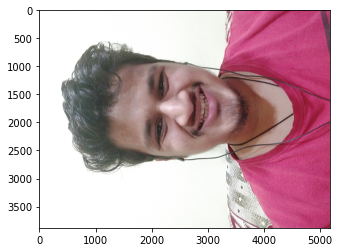

In [66]:
prediction = np.argmax(model.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)

In [ ]:
img = np.fromstring(X_over_series[4], dtype='int', sep=' ')
img = img.reshape(48,48,1)

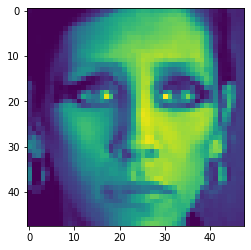

In [ ]:
plt.imshow(np.array(img.reshape(48,48)))

In [ ]:
model.load_weights('/content/drive/My Drive/emotion_weights_1.hdf5')

In [67]:
face_haar_cascade = cv2.CascadeClassifier('C:\\Users\\ketan\\Desktop\\Machine Learning\\Facial Expression\\archive\\haarcascade_frontalface_default.xml')



In [ ]:
cap = cv2.VideoCapture(0)

while True:
 
 _,cap_image = cap.read()




 cap_img_gray = cv2.cvtColor(cap_image, cv2.COLOR_BGR2GRAY)

 faces = face_haar_cascade.detectMultiScale(cap_img_gray, 1.3, 5)

 for (x,y,w,h) in faces:

   cv2.rectangle(cap_image, (x,y), (x+w,y+h),(255,0,0),2)
   roi_gray = cap_img_gray[y:y+h, x:x+w]
   roi_gray = cv2.resize(roi_gray, (48,48))
   img_pixels = image.img_to_array(roi_gray)
   img_pixels = np.expand_dims(img_pixels, axis=0)

   predictions = model.predict(img_pixels)
   emotion_label = np.argmax(predictions)

   emotion_prediction = label_dict[emotion_label]

   cv2.putText(cap_image, emotion_prediction, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1 )

   resize_image = cv2.resize(cap_image, (1000,700))
   cv2.imshow('Emotion',resize_image)

   if cv2.waitKey(10) == ord('b'):
    break
  
cap.release()
cv2.destroyAllWindows 


In [38]:
label_dict[1]

'Disgust'